In [49]:
%pylab inline
import pandas as pd

Populating the interactive namespace from numpy and matplotlib


In [50]:
from sklearn.feature_extraction.text import CountVectorizer
corpus = [
    'This is the first document.',
    'This document is the second document.',
    'And this is the third one.',
    'Is this the first document?',
]
vectorizer = CountVectorizer(ngram_range=(1,2))
X = vectorizer.fit_transform(corpus)
print(vectorizer.get_feature_names())
['and', 'document', 'first', 'is', 'one', 'second', 'the', 'third', 'this']
print(X.toarray())  

['and', 'and this', 'document', 'document is', 'first', 'first document', 'is', 'is the', 'is this', 'one', 'second', 'second document', 'the', 'the first', 'the second', 'the third', 'third', 'third one', 'this', 'this document', 'this is', 'this the']
[[0 0 1 0 1 1 1 1 0 0 0 0 1 1 0 0 0 0 1 0 1 0]
 [0 0 2 1 0 0 1 1 0 0 1 1 1 0 1 0 0 0 1 1 0 0]
 [1 1 0 0 0 0 1 1 0 1 0 0 1 0 0 1 1 1 1 0 1 0]
 [0 0 1 0 1 1 1 0 1 0 0 0 1 1 0 0 0 0 1 0 0 1]]


In [51]:
df = pd.read_csv("all_processed2.csv")
df.head(2)
df.columns.tolist()

['Unnamed: 0',
 'Unnamed: 0.1',
 'company',
 'location',
 'dates',
 'job-title',
 'summary',
 'pros',
 'cons',
 'advice-to-mgmt',
 'overall-ratings',
 'work-balance-stars',
 'culture-values-stars',
 'carrer-opportunities-stars',
 'comp-benefit-stars',
 'senior-mangemnet-stars',
 'helpful-count',
 'link',
 'summary_processed',
 'summary_char_length',
 'summary_word_count',
 'summary_stopword_count',
 'summary_stopword_freq',
 'pros_processed',
 'pros_char_length',
 'pros_word_count',
 'pros_stopword_count',
 'pros_stopword_freq',
 'cons_processed',
 'cons_char_length',
 'cons_word_count',
 'cons_stopword_count',
 'cons_stopword_freq',
 'text',
 'text_processed',
 'text_char_length',
 'text_word_count',
 'text_stopword_count',
 'text_stopword_freq']

### At this point there were still rows left with None or NaN values in summary, pros or cons. We went and removed these rows

In [52]:
df.count()[0]

67399

In [53]:
df = df[df["summary"].notna()]
df = df[df["pros"].notna()]
df = df[df["cons"].notna()]
df = df[df["overall-ratings"].notna()]

0 rows was removed.

In [54]:
df.count()[0]

67399

### In order to make it easier to work with the data we added a new column containing the text for summary, pros and cons.

In [55]:
df[["summary","pros","cons", "text"]].head(3)

,summary,pros,cons,text
0,Best Company to work for,People are smart and friendly,Bureaucracy is slowing things down,Best Company to work for People are smart and ...
1,"Moving at the speed of light, burn out is inev...","1) Food, food, food. 15+ cafes on main campus ...",1) Work/life balance. What balance? All those ...,"Moving at the speed of light, burn out is inev..."
2,Great balance between big-company security and...,"* If you're a software engineer, you're among ...","* It *is* becoming larger, and with it comes g...",Great balance between big-company security and...


Mean text length in characters

In [56]:
np.mean(df["text"].str.len())

332.1738007982314

In [57]:
df["overall-ratings"].head()

0    5.0
1    4.0
2    5.0
3    5.0
4    5.0
Name: overall-ratings, dtype: float64

### We needed a binary label to be able to predict whether a review was positive or negative. We decided to define positive reviews as a 4-star rating or leaving the rest as negative.

In [58]:
df["label"] = df.apply(lambda row: 1 if row["overall-ratings"] >= 4 else 0, axis=1)

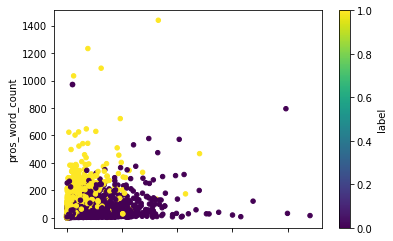

In [59]:
ax2 = df.plot.scatter(x='cons_word_count',
                       y='pros_word_count',
                       c='label',
                       colormap='viridis')

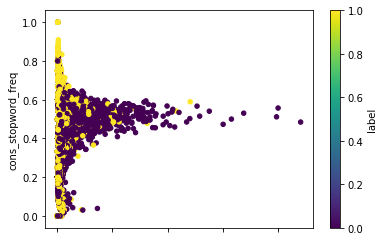

In [60]:
ax2 = df.plot.scatter(x='cons_word_count',
                       y='cons_stopword_freq',
                       c='label',
                       colormap='viridis')

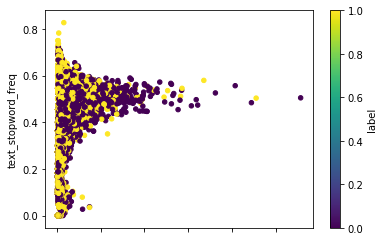

In [61]:
ax2 = df.plot.scatter(x='text_word_count',
                       y='text_stopword_freq',
                       c='label',
                       colormap='viridis')

In [62]:
import seaborn as sns

df2_index = ["pros_word_count", "pros_stopword_freq", "pros_stopword_count", "pros_char_length"]
df2_index.extend(["cons_word_count", "cons_stopword_freq", "cons_stopword_count", "cons_char_length"])
df2_index.extend(["summary_word_count", "summary_stopword_freq", "summary_stopword_count", "summary_char_length"])
df2_index.extend(["text_word_count", "text_stopword_freq", "text_stopword_count", "text_char_length"])
df2_index.extend(["label"])

'''
df2_index = ["pros_word_count", "pros_stopword_freq"]
df2_index.extend(["cons_word_count", "cons_stopword_freq"])
df2_index.extend(["summary_word_count", "summary_stopword_freq"])
df2_index.extend(["label"])
'''

df2_index = ["pros_word_count", "pros_stopword_freq", "pros_char_length"]
df2_index.extend(["cons_word_count", "cons_stopword_freq", "cons_char_length"])
df2_index.extend(["summary_word_count", "summary_stopword_freq", "summary_char_length"])
df2_index.extend(["label"])


df2 = df[df2_index]
#df2 = df2[:1000]

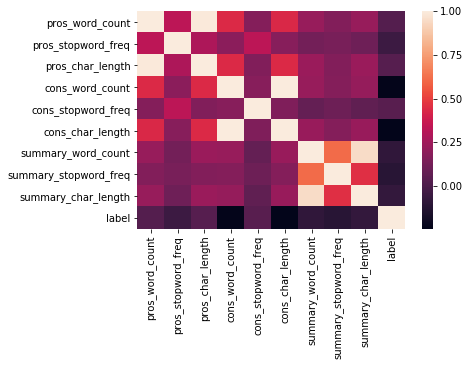

In [63]:
sns.heatmap(df2.corr())

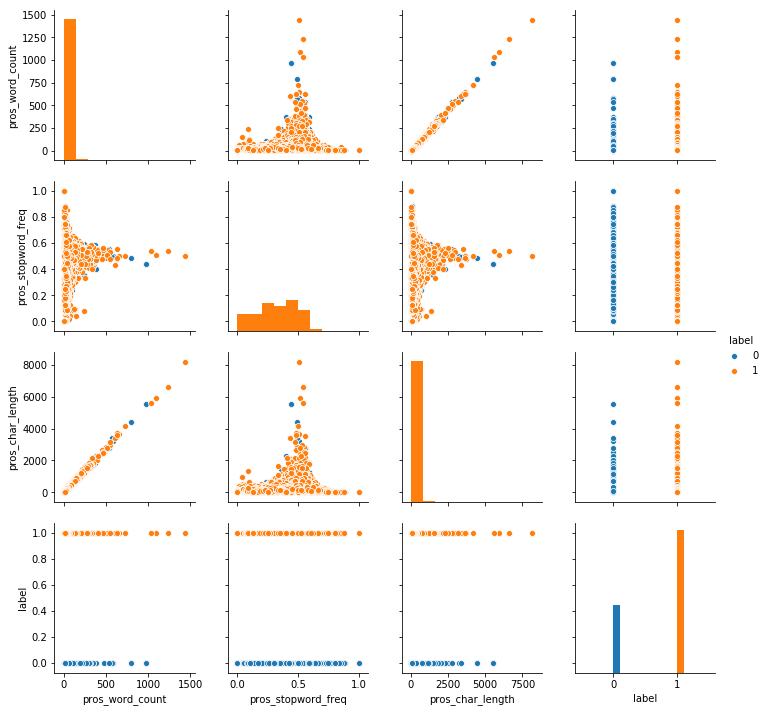

In [64]:
plot_index = ["pros_word_count", "pros_stopword_freq", "pros_char_length", "label"]
sns.pairplot(df2[plot_index], hue="label", diag_kind="hist")

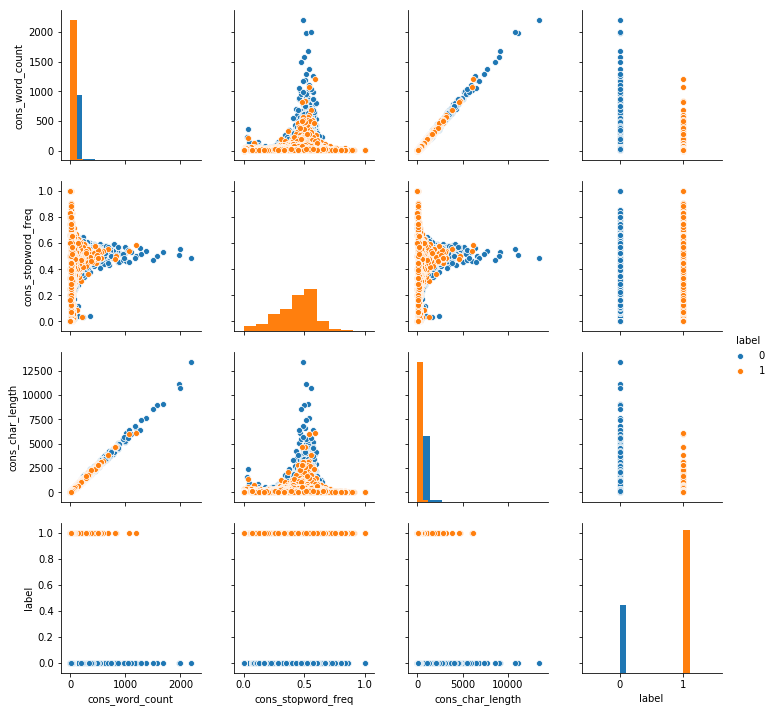

In [65]:
plot_index = ["cons_word_count", "cons_stopword_freq", "cons_char_length", "label"]
sns.pairplot(df2[plot_index], hue="label", diag_kind="hist")

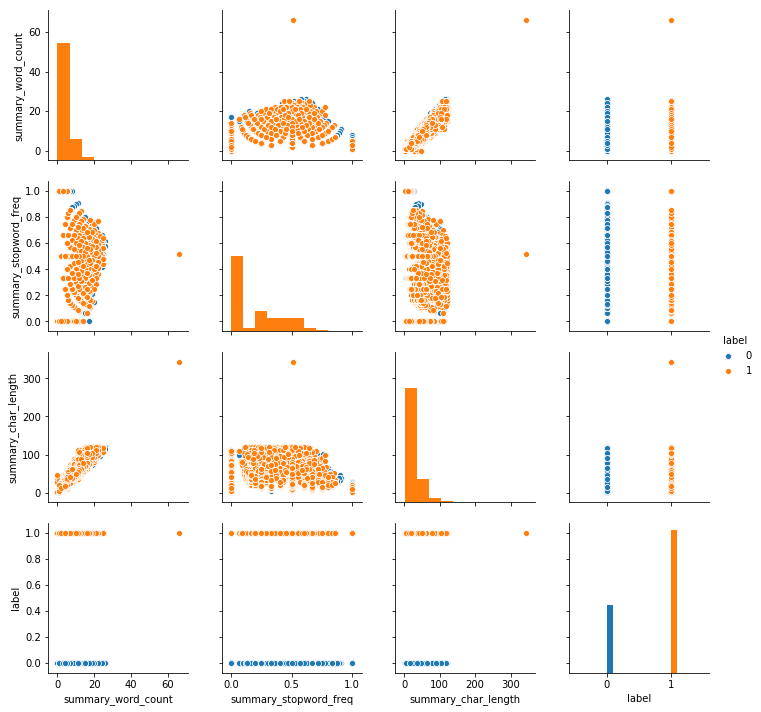

In [66]:
plot_index = ["summary_word_count", "summary_stopword_freq", "summary_char_length", "label"]
sns.pairplot(df2[plot_index], hue="label", diag_kind="hist")

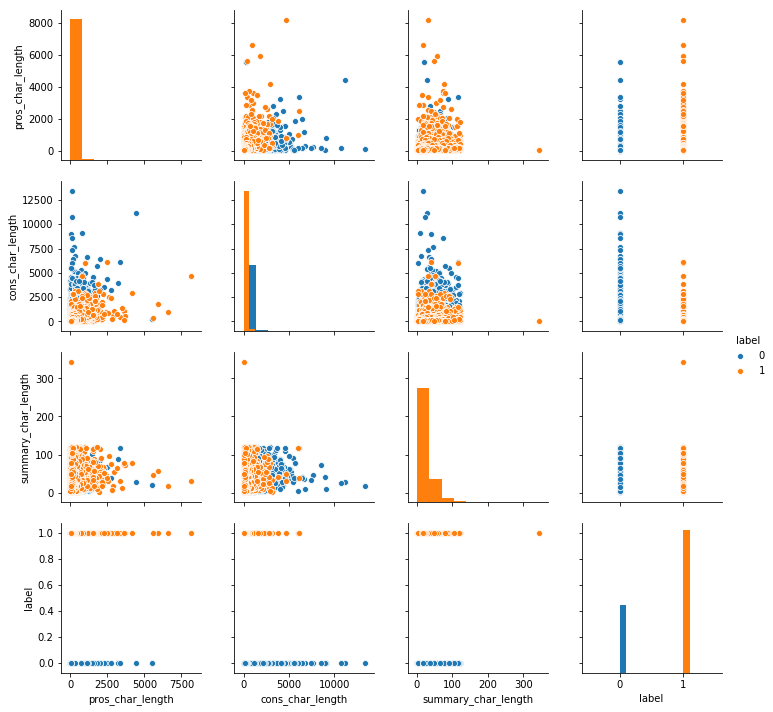

In [67]:
plot_index = ["pros_char_length", "cons_char_length", "summary_char_length", "label"]
sns.pairplot(df2[plot_index], hue="label", diag_kind="hist")

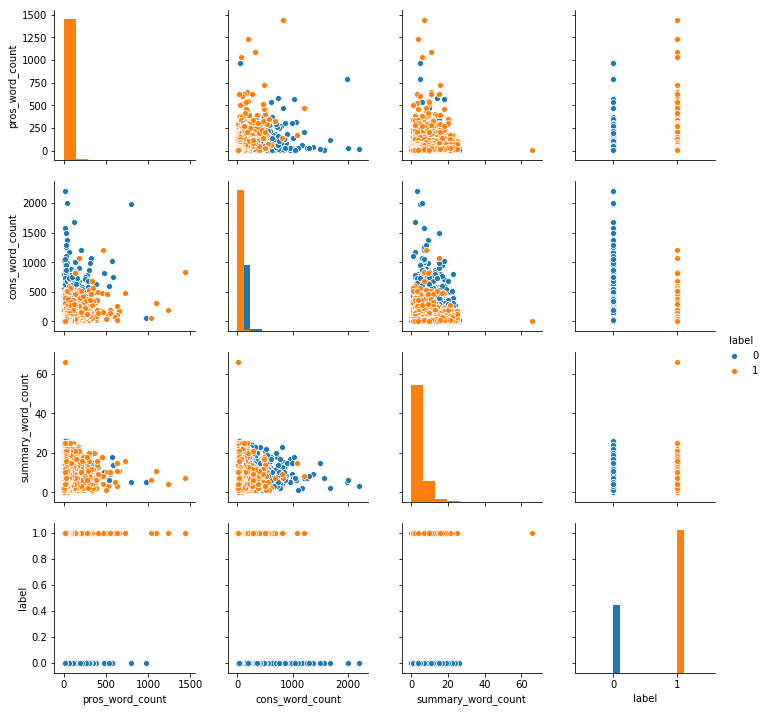

In [68]:
plot_index = ["pros_word_count", "cons_word_count", "summary_word_count", "label"]
sns.pairplot(df2[plot_index], hue="label", diag_kind="hist")

In [20]:
from sklearn.model_selection import KFold
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score

y = df2["label"]
X = df2.drop(["label"], axis=1)

kf = KFold(n_splits=10, shuffle=True, random_state=4)
def do_cross_val(model):
    acc_score = cross_val_score(model, X, y, cv=kf)
    print(acc_score)
    print(np.mean(acc_score))

In [21]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

pipe_knn = make_pipeline(StandardScaler(with_mean=False), KNeighborsClassifier(n_neighbors=10))
acc = do_cross_val(pipe_knn)

[0.71795252 0.72017804 0.72329377 0.72596439 0.72299703 0.71691395
 0.73293769 0.71632047 0.71750742 0.71331058]
0.7207375862103887


In [22]:
from sklearn.linear_model import LogisticRegression

pipe_lr = make_pipeline(StandardScaler(with_mean=False), LogisticRegression(random_state=21, solver='liblinear', C=1))
do_cross_val(pipe_lr)

[0.74376855 0.74362018 0.74940653 0.74643917 0.74391691 0.74792285
 0.76246291 0.74970326 0.73991098 0.73408518]
0.7461236511153686


In [23]:
from sklearn.tree import DecisionTreeClassifier

pipe_dt = make_pipeline(StandardScaler(with_mean=False), DecisionTreeClassifier(max_depth=45, random_state=21))
do_cross_val(pipe_dt)

[0.66083086 0.65697329 0.6620178  0.65919881 0.65237389 0.6648368
 0.66543027 0.66350148 0.65459941 0.6627096 ]
0.6602472212106948


In [24]:
from sklearn.naive_bayes import GaussianNB

pipe_nb = make_pipeline(StandardScaler(with_mean=False), GaussianNB())
do_cross_val(pipe_nb)

[0.70652819 0.71083086 0.71454006 0.70964392 0.70400593 0.71261128
 0.72195846 0.71320475 0.70326409 0.69550378]
0.7092091321036194


In [ ]:
from sklearn.svm import SVC

pipe_svm = make_pipeline(StandardScaler(with_mean=False), SVC(C=.1, random_state=21, kernel="poly", gamma="auto"))
do_cross_val(pipe_svm)

In [ ]:
prev

### Now with the label column we can see that the dataset is quite unbalanced

In [25]:
df_pos = df[df["label"] == 1]
df_neg = df[df["label"] == 0]
print("Positive: {0}, Negative: {1}".format(df_pos.count()[0], df_neg.count()[0]))

Positive: 45607, Negative: 21792


### We did a resampling in order to balance out the dataset

In [26]:
from sklearn.utils import resample

In [27]:
df_pos_res = resample(df_pos, 
                   n_samples=df_neg.count()[0], 
                   random_state=23)

In [28]:
df_pos_res.count()[0]

21792

In [29]:
df = df_neg.append(df_pos_res)

In [30]:
y = df["label"]

### We used the TfidVectorizer from sci-kit learn to transform the strings into word vectors. We chose to only vectorize the 3000 most common words for simplicity sake.

In [45]:
from sklearn.feature_extraction.text import TfidfVectorizer
no_of_words = 3000
tfidf = TfidfVectorizer(max_features=no_of_words, ngram_range=(1,2))

In [46]:
X = tfidf.fit_transform(df["text"].tolist())
X.shape

(43584, 3000)

### We devided the data into training and testing data

In [47]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.2, 
                                                    random_state=22)

### In order to reduce the dimensionality of the input data we created an autoencoder

In [48]:
import keras.layers as layers
import keras.models as models

encoding_dim = 32

input_layer = layers.Input(shape=(no_of_words,))
encoded = layers.Dense(encoding_dim, activation='relu')(input_layer)
decoded = layers.Dense(no_of_words, activation='sigmoid')(encoded)

In [49]:
autoencoder = models.Model(input_layer, decoded)

In [50]:
encoder = models.Model(input_layer, encoded)

In [51]:
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

In [52]:
autoencoder.fit(X_train, X_train,
                epochs=10,
                batch_size=256,
                shuffle=True)

Epoch 1/10
34867/34867 [==============================] - 5s 148us/step - loss: 0.6876
Epoch 2/10
34867/34867 [==============================] - 5s 140us/step - loss: 0.6763
Epoch 3/10
34867/34867 [==============================] - 5s 144us/step - loss: 0.6627
Epoch 4/10
34867/34867 [==============================] - 5s 143us/step - loss: 0.6266
Epoch 5/10
34867/34867 [==============================] - 5s 133us/step - loss: 0.4686
Epoch 6/10
34867/34867 [==============================] - 5s 131us/step - loss: 0.2033
Epoch 7/10
34867/34867 [==============================] - 5s 132us/step - loss: 0.0814
Epoch 8/10
34867/34867 [==============================] - 5s 133us/step - loss: 0.0456
Epoch 9/10
34867/34867 [==============================] - 5s 133us/step - loss: 0.0321
Epoch 10/10
34867/34867 [==============================] - 5s 133us/step - loss: 0.0256


In [53]:
X_train_encoded = encoder.predict(X_train)
X_train_encoded.shape

(34867, 32)

In [54]:
type(X_train_encoded)

numpy.ndarray

In [55]:
y_train.shape

(34867,)

### We created a function to easily run cross_val_score on the model with the correct data and print out the results

In [56]:
from sklearn.model_selection import KFold
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score

kf = KFold(n_splits=10, shuffle=True, random_state=4)
def do_cross_val(model):
    acc_score = cross_val_score(model, X_train_encoded, y_train, cv=kf)
    print(acc_score)
    print(np.mean(acc_score))

### We ran with various different models trying to tweak the settings for best result

In [57]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

pipe_knn = make_pipeline(StandardScaler(with_mean=False), KNeighborsClassifier(n_neighbors=10))
do_cross_val(pipe_knn)

[0.56438199 0.55176369 0.55233725 0.54946946 0.54172641 0.547462
 0.55348437 0.55651176 0.55507745 0.54618474]
0.5518399132191842


In [58]:
from sklearn.linear_model import LogisticRegression

pipe_lr = make_pipeline(StandardScaler(with_mean=False), LogisticRegression(random_state=21, solver='liblinear', C=1))
do_cross_val(pipe_lr)

[0.56868368 0.56237453 0.57556639 0.57527961 0.56352165 0.57527961
 0.56438199 0.57056799 0.56110155 0.58175559]
0.5698512596825089


In [59]:
from sklearn.tree import DecisionTreeClassifier

pipe_dt = make_pipeline(StandardScaler(with_mean=False), DecisionTreeClassifier(max_depth=45, random_state=21))
do_cross_val(pipe_dt)

[0.59506739 0.60137654 0.60825925 0.59994264 0.59277316 0.60854603
 0.59305994 0.58146873 0.59781985 0.60126219]
0.5979575724340271


In [60]:
from sklearn.naive_bayes import GaussianNB

pipe_nb = make_pipeline(StandardScaler(with_mean=False), GaussianNB())
do_cross_val(pipe_nb)

[0.55463149 0.54115285 0.53943218 0.55061658 0.54344709 0.53541726
 0.55291081 0.55077453 0.53815261 0.55077453]
0.5457309923046686


In [ ]:
acc_score = cross_val_score(pipe_nb, X_train.toarray(), y_train, cv=kf)
print(acc_score)
print(np.mean(acc_score))

Since the SVM classifier was very slow at training the data we trained on only 1000 samples so we could easily tweak the settings and retrain the model

In [ ]:
Xs = encoder.predict(X_test[:1000])
ys = y_test[:1000]

In [ ]:
from sklearn.svm import SVC

pipe_svm = make_pipeline(StandardScaler(with_mean=False), SVC(C=.1, random_state=21, kernel="rbf", gamma="auto"))
acc_score = cross_val_score(pipe_svm, Xs, ys, cv=kf)
print(acc_score)
print(np.mean(acc_score))

Of all of the ML models we used the D-Tree seemed to perform the best with an accuracy of almost 60%

## Conclusion

Did we manage to create a model that could answer the business question? With 60%-ish accuracy, yes.
The accuracy of the model is not utterly impressive. We might be able to improve the predictions by using a neural network but that will be for some other time.
However we learned a lot about Natural Language Processing and we think we will be able to do better in the future.